In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

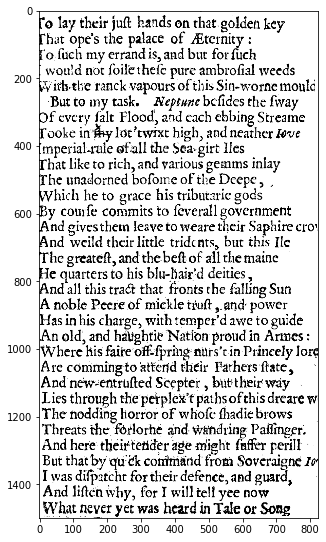

(1500, 825)


In [9]:
img = cv.imread("anon_blank_blank_00height_amaske-6912_page1r.tif", 0)
plt.figure(figsize=(5,10))
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

In [10]:
sumMatrix = np.sum(255 - img, 1)
print(sumMatrix.shape)

(1500,)


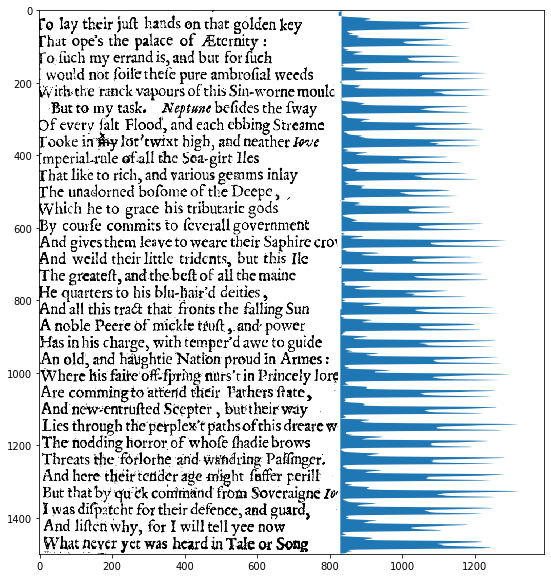

In [11]:
fig, ax = plt.subplots(figsize= (10,10))
ax.imshow(img, cmap="gray")
#ax.plot((sumMatrix.transpose() * 600 / max(sumMatrix)) + 800, np.arange(0, sumMatrix.shape[0]))
ax.fill_between((sumMatrix.transpose() * 500 / max(sumMatrix))+ 825, 825, np.arange(0, sumMatrix.shape[0]))
plt.show()

In [12]:
print(max(sumMatrix))

120318


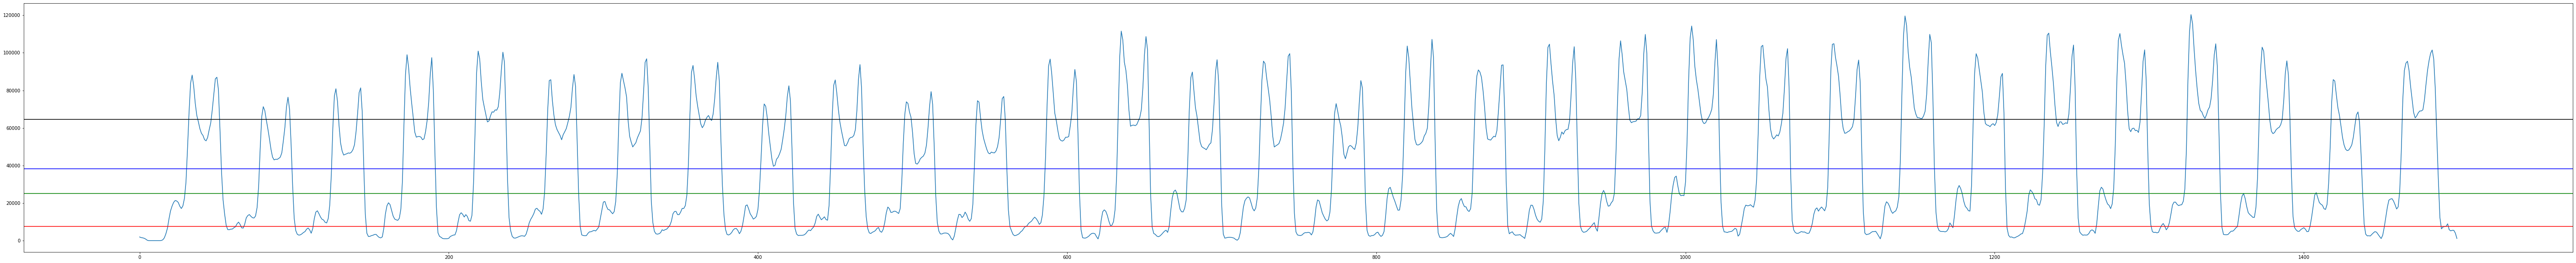

In [13]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
plt.axhline(y=np.percentile(sumMatrix, 25), color="red")
plt.axhline(y=np.percentile(sumMatrix, 50), color="green")
plt.axhline(y=np.percentile(sumMatrix, 75), color="black")
plt.axhline(y=np.mean(sumMatrix), color="blue")
plt.show()

In [14]:
df = pd.DataFrame(sumMatrix)
df.describe()

,0
count,1500.000000
mean,38280.427333
std,32246.554586
min,0.000000
25%,7467.250000
50%,25028.500000
75%,64461.000000
max,120318.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd76925e10>]],
      dtype=object)

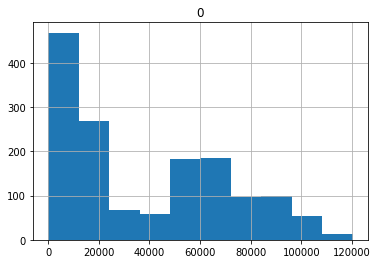

In [15]:
df.hist()

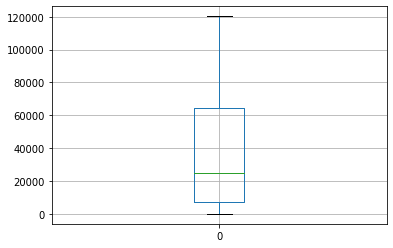

In [16]:
df.boxplot()

In [17]:
# r is the row height
# d is the top offset
# k is the number of rows = floor(numPixelRows / r)

rRange = np.arange(25, 51)
dRange = np.arange(0, 21)

kRange = np.unique(np.floor(sumMatrix.shape[0] / rRange))

In [18]:
sol_rows = pd.read_csv("anon_blank_blank_00height_amaske-6912_page1r_lines.csv", header=None, names=["start", "end"])
print(sol_rows.shape)

(31, 2)


In [19]:
rowHeight = sol_rows.loc[0].end - sol_rows.loc[0].start
print(rowHeight)

47


In [20]:
cutRowSums = []
for row_line in range(0,sol_rows.shape[0]):
    cutLine = 255 - img[sol_rows.loc[row_line].start:sol_rows.loc[row_line].end,:]
    cutRowSums.append(np.sum(cutLine, axis=1))
cutRowSums = np.array(cutRowSums)
sol_means = np.mean(cutRowSums, axis=0)
sol_var = np.var(cutRowSums, axis=0)
print(sol_means.shape)
print(np.sum(sol_var))

(47,)
3666720353.962539


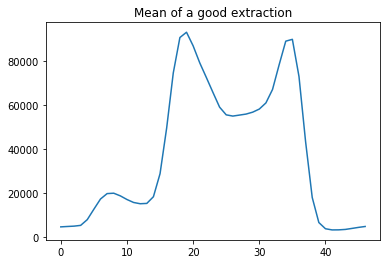

In [21]:
plt.title("Mean of a good extraction")
plt.plot(np.arange(0, sol_means.shape[0]), sol_means.transpose())
plt.show()

In [22]:
newWidth = 25;
res = sol_means[np.linspace(0, sol_means.shape[0] - 1, newWidth).astype(int)]
print(res.shape)

(25,)


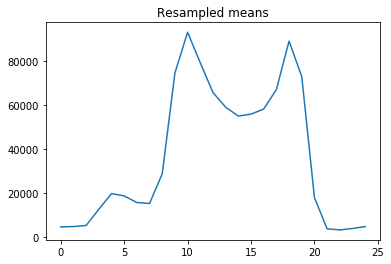

In [23]:
plt.title("Resampled means")
plt.plot(np.arange(0, res.shape[0]), res.transpose())
plt.show()

In [24]:
rdvars = np.zeros(shape=(rRange.shape[0], dRange.shape[0]))
for r in rRange:
    for d in dRange:
        rd_splits = np.array([(r*i + d) for i  in range(int(np.floor((sumMatrix.shape[0] / r))))])
        #print(r_splits)
        #print(r_splits.shape)
        img_splits_rd = np.array(np.array_split(sumMatrix, rd_splits))
        #print("Offset from top (d): " + str(d))
        #print("Row sum values in each split")
        #print(img_splits_rd.shape)

        #fig, axs = plt.subplots(2, 1, constrained_layout = True)
        #rand = np.random.randint(1, img_splits_rd.shape[0] - 1)
        #axs[0].set_title("Example split (Number " + str(rand) + " of " + str(img_splits_rd.shape[0]) + ")")
        #axs[0].plot(np.arange(0, img_splits_rd[rand].shape[0]), img_splits_rd[rand].transpose())
        #fig.suptitle("r = " + str(r) + ", d = " + str(d), fontsize=16)
        
        img_splits_rd = np.vstack(img_splits_rd[1:-1])
        #normalizing heights
        #colmax = np.amax(img_splits_rd, axis=0)
        #img_splits_rd = np.divide(img_splits_rd, colmax)
        
        
        #-------------------------------------------------#
        #mean_splits_rd = np.mean(img_splits_rd, axis=0)
        #var_splits_rd = np.var(img_splits_rd, axis=0)
        
        #mean_splits_rd = np.mean(img_splits_rd[1:-1], axis=0)
        #var_splits_rd = np.var(img_splits_rd[1:-1], axis=0)
        #print(var_splits_d)
        #print(mean_splits_rd.shape)
        #-------------------------------------------------#
        
        res = sol_means[np.linspace(0, sol_means.shape[0] - 1, r).astype(int)]
        sq = np.subtract(img_splits_rd, res)**2
        sq = np.sum(sq)
        
        rdvars[r - rRange[0], d - dRange[0]] = sq #np.sum(var_splits_rd)
        #axs[1].set_title("Mean of Splits")
        #axs[1].plot(np.arange(0, img_splits_rd[1].shape[0]), mean_splits_rd.transpose())
        #plt.show()

In [25]:
a = np.array([[1,2],
             [2,3],
             [3,4]])
vec = np.amax(a, axis=0)
print(vec)

[3 4]


In [26]:
print(rdvars.shape)

(26, 21)


In [27]:
best = np.where(rdvars == rdvars.min())
R2 = best[0][0] + rRange[0]
D2 = best[1][0] + dRange[0]
print(best)
print("best r2 = " + str(R2) + ", best d2 = " + str(D2))
print("lowest var = " + str(rdvars[best[0][0], best[1][0]]))

(array([21]), array([19]))
best r2 = 46, best d2 = 19
lowest var = 313817659361.54834


[19, 65, 111, 157, 203, 249, 295, 341, 387, 433, 479, 525, 571, 617, 663, 709, 755, 801, 847, 893, 939, 985, 1031, 1077, 1123, 1169, 1215, 1261, 1307, 1353, 1399, 1445]
32


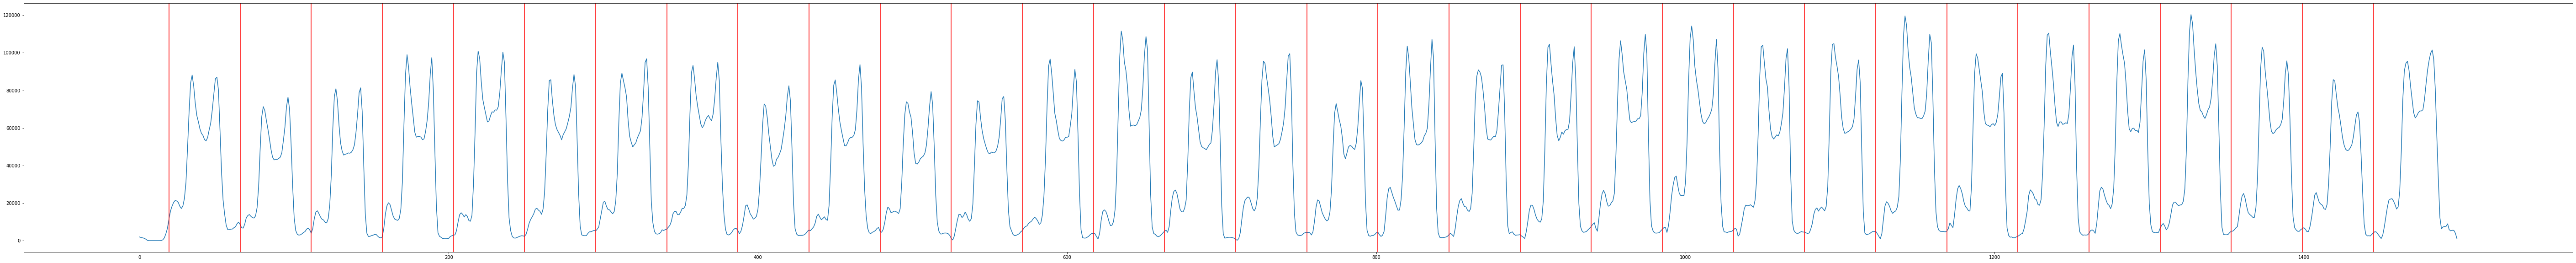

46


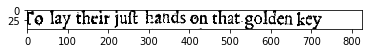

46


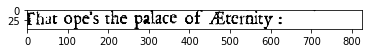

46


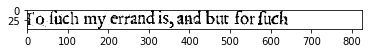

46


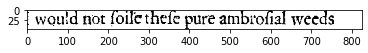

46


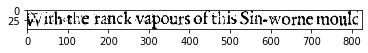

46


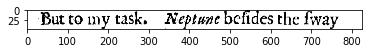

46


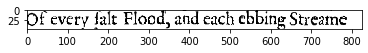

46


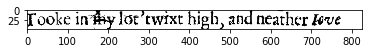

46


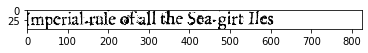

46


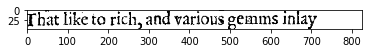

46


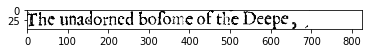

46


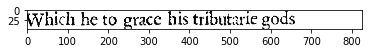

46


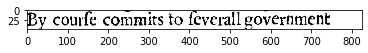

46


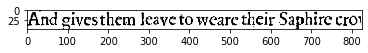

46


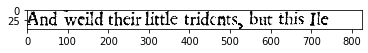

46


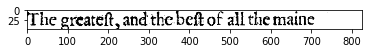

46


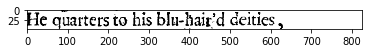

46


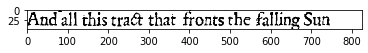

46


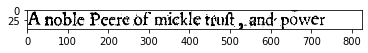

46


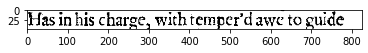

46


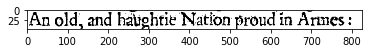

46


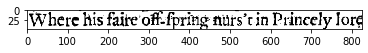

46


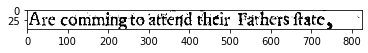

46


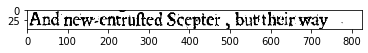

46


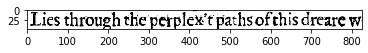

46


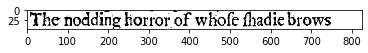

46


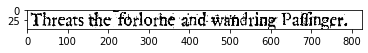

46


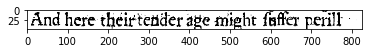

46


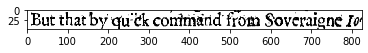

46


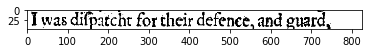

46


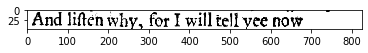

In [28]:
split_indices = [(R2*(i) + D2) for i  in range(int(np.floor((sumMatrix.shape[0] / R2))))]
print(split_indices)
print(len(split_indices))
split = np.array(np.array_split(sumMatrix, split_indices))

plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())

for vl in split_indices:
    plt.axvline(x=vl, color="red")
plt.show()
for row in range(0,np.array(split_indices).shape[0] - 1):
    rowHeight = split_indices[row+1] - split_indices[row]
    print(rowHeight)
    cutLine = img[split_indices[row]:split_indices[row+1],:]
    plt.imshow(cutLine, cmap="gray")
    plt.show()
    #plt.plot(np.arange(0, cutLine.shape[0]), np.sum(255 - cutLine, axis=1))
    #plt.show()

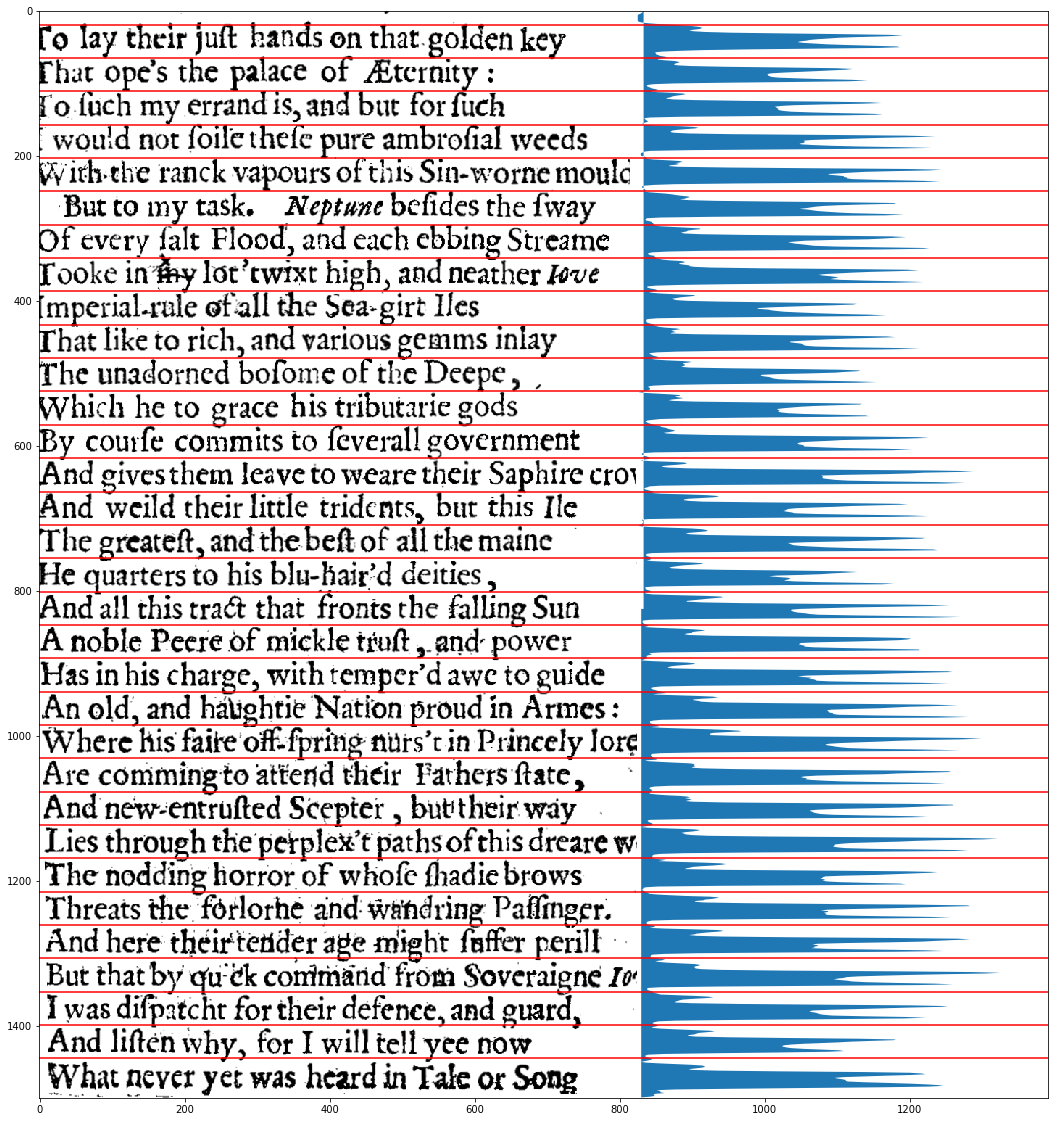

In [29]:
fig, ax = plt.subplots(figsize= (20,20))
ax.imshow(img, cmap="gray")
ax.fill_between((sumMatrix.transpose() * 500 / max(sumMatrix))+ 825, 825, np.arange(0, sumMatrix.shape[0]))
for vl in split_indices:
    ax.axhline(y=vl, color="red")
plt.show()